# Лабораториска вежба бр. 5

## Вовед

**Сопствени вектори** и **сопствени вредности** (анг. *eigenvectors*, *eigenvalues*) се термини кои опишуваат одредени својства кај квадратните матрици.

Нека $A$ е квадратна матрица и нека важи равенството
$$A \mathbf{v} = \lambda \mathbf{v}$$
за некој вектор $\mathbf{v}$ и некој скалар $\lambda$.  
Векторот $\mathbf{v}$ се нарекува сопствен вектор на матрицата $A$, и тој соодветствува на сопствената вредност $\lambda$.

За пресметка на сопствените вектори и сопствените вредности во `numpy` ќе ја користиме функцијата `numpy.linalg.eig`.

In [2]:
import numpy as np

A = np.array([[1, 2], [2, 8]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print(eigenvalues, end='\n\n')
print(eigenvectors, end='\n\n')

# Внимавај на индексирањето
print('Сопствената вредност: ', eigenvalues[1])
print(' одговара на сопствениот вектор: ', eigenvectors[:, 1])

[0.46887113 8.53112887]

[[-0.96649965 -0.25666794]
 [ 0.25666794 -0.96649965]]

Сопствената вредност:  8.531128874149275
 одговара на сопствениот вектор:  [-0.25666794 -0.96649965]


Сопствените вектори пред и по трансформација го имаат истиот правец, па така матрицата $A$ во равенката
$$A \mathbf{v} = \lambda \mathbf{v}$$
ја интерпретираме како скалирачка функција за сопствените вектори.

b-eigenvector.svg

На примерот на сликата гледаме како само векторите кои лежат на оската на ротација (сино) нема да се ротираат, туку само ќе се скалираат ($\lambda = 1$).

Сопствените вредности може да бидат и комплексни броеви. Во поголемиот дел од вежбите ќе работиме само со реални сопствени вредности. Поради можни грешки во пресметковната прецизност од страна на `numpy`, некогаш ќе биде потребно да ги кастираме вредностите во реални броеви.

In [3]:
eigenvalues = np.real(eigenvalues)
eigenvectors = np.real(eigenvectors)

**Дијагонализација** на квадратната матрица $A$ е претворање на истата (ако е можно) во форма $PDP^{-1}$ каде $P$ ги содржи сопствените вектори, а $D$ е дијагонална матрица од сопствените вредности.

In [4]:
A = np.random.random((4, 4))
A = (A + A.T) / 2  # Симетрични матрици секогаш може да се дијагонализираат

eigenvalues, eigenvectors = np.linalg.eig(A)

P = eigenvectors
D = np.diag(eigenvalues)

P_inv = np.linalg.inv(P)
B = P @ D @ P_inv

# Двете матрици треба да се идентични
print(A, end='\n\n')
print(B)

[[0.0540151  0.39505349 0.17870352 0.35951766]
 [0.39505349 0.74602178 0.53198969 0.24807586]
 [0.17870352 0.53198969 0.90739345 0.71994227]
 [0.35951766 0.24807586 0.71994227 0.41527492]]

[[0.0540151  0.39505349 0.17870352 0.35951766]
 [0.39505349 0.74602178 0.53198969 0.24807586]
 [0.17870352 0.53198969 0.90739345 0.71994227]
 [0.35951766 0.24807586 0.71994227 0.41527492]]


## Основен дел

Да се пресметаат сопствените вектори и сопствените вредности на матрицата
$$A = \begin{bmatrix}1 & 3 \\ 2 & 0\end{bmatrix}.$$

In [8]:
A = np.array([[1, 3], [2, 0]])

eigenvalues, eigenvectors = np.linalg.eig(A)

print(eigenvalues, end='\n\n')
print(eigenvectors, end='\n\n')

[ 3. -2.]

[[ 0.83205029 -0.70710678]
 [ 0.5547002   0.70710678]]



Да се пресметаат сопствените вектори и сопствените вредности за матрицата
$$A = \begin{bmatrix}-2 & 0 & 0 \\ 0 & -3 & 0 \\ 0 & 0 & 2\end{bmatrix}.$$

Што забележуваш за сопствените вредности?

In [9]:
A = np.array([[-2, 0, 0], [0, -3, 0], [0, 0, 2]])
eigenValues, eigenVectors, = np.linalg.eig(A)
print(eigenValues)
print(eigenVectors)

[-2. -3.  2.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


EigenValues are the same with the non 0 entries in each row in the matrix A

Дадена е сингуларната матрица $$A = \begin{bmatrix}1 & 2 \\ 3 & 6\end{bmatrix},$$
т.е. $det(A) = 0$.

Да се пресметаат сопствените вредности и да се утврди дека 0 е една од сопствените вредности.



In [10]:
A = np.array([[1, 2], [3, 6]])
eigenValues, eigenVectors, = np.linalg.eig(A)
print(eigenValues)
print(eigenVectors)
for value in eigenValues:
    if value == 0:
        print("There is an eigenvalue == 0")

[0. 7.]
[[-0.89442719 -0.31622777]
 [ 0.4472136  -0.9486833 ]]
There is an eigenvalue == 0


Дадена е сингуларната матрица $$A = \begin{bmatrix}2 & 2 & -2 \\ 5 & 1 & -3 \\ 1 & 5 & -3\end{bmatrix}.$$

а) Утврди дека сите сопствени вредности на матрицата се 0. Притоа имај ги предвид можните нумерички грешки кои може да се појават поради прецизноста со која се претставуваат броевите во `Python`.

б) Ваквиот тип на матрици $N$ со сопствени вредности нула (анг. *Nilpotent*) го имаат следното својство: $$N^k = \mathbf{0}$$ за некој позитивен цел број $k$. Најди го најмалиот таков број за матрицата $A$.


In [11]:
A = np.array([[2, 2, -2], [5, 1, -3], [1, 5, -3]])
eigenValues, eigenVectors, = np.linalg.eig(A)
roundedEigenValues = (np.round(np.real(eigenValues)))
# print(roundedEigenValues)
if len(list(filter(lambda x: x == 0, roundedEigenValues))) == len(roundedEigenValues):
    print("All the eigenValues are 0")
    print("Proof,", roundedEigenValues)

All the eigenValues are 0
Proof, [-0.  0.  0.]


In [12]:
k = 1
zeroMatrix  =np.zeros((3, 3))
while True:
    matrixProduct = A
    for i in range(2,k+1):
        matrixProduct = matrixProduct @ A
    if np.array_equal(matrixProduct, zeroMatrix):
        break
    k += 1
    
print("For k =",k,f", A^{k} = 0")

For k = 3 , A^3 = 0


За произволна матрица $A$, провери дека скалиран сопствен вектор за сопствената вредност $\lambda$ е исто така сопствен вектор.

Односно покажи дека ако важи
$$A\mathbf{v} = \lambda \mathbf{v},$$
тогаш исто важи и
$$A(k\mathbf{v}) = \lambda k \mathbf{v}$$
за произволен скалар $k$.

In [13]:
A = np.array([[-2, 0, 0], [0, -3, 0], [0, 0, 2]])
eigenValues, eigenVectors, = np.linalg.eig(A)
# print(eigenValues)
# print(eigenVectors)

eigen_vector= eigenVectors[0]
print("For A =\n", A,"\nand eigenvector v = ",eigen_vector)
print("Av = ", A @ eigen_vector,",where lamda=", eigenValues[0])
k1 = 3
scaled_eigen_vector = k1 * eigen_vector
print("If we scale v with k = 3 -> v =", scaled_eigen_vector)
print("Then, A(kv) = ", A @ (k * eigen_vector), "which is the same with lamda*kv=", eigenValues[0] * k * eigen_vector)

For A =
 [[-2  0  0]
 [ 0 -3  0]
 [ 0  0  2]] 
and eigenvector v =  [1. 0. 0.]
Av =  [-2.  0.  0.] ,where lamda= -2.0
If we scale v with k = 3 -> v = [3. 0. 0.]
Then, A(kv) =  [-6.  0.  0.] which is the same with lamda*kv= [-6. -0. -0.]


Дефинирајте матрица на ротација $R$ во 2D простор.

а) Пред да ги пресметате сопствените вредности и сопствените вектори, размислете како изгледа трансформацијата за аглите $\alpha = 90^{\circ}$ и $\alpha = 180^{\circ}$.

Кои сопствени вредности ги очекуваме да се добијат?

б) Пресметај ги сопствените вредности.

In [14]:
def get_rotation_matrix(theta):
    theta_rad = np.radians(theta)
    return np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad), np.cos(theta_rad)]
    ])

In [15]:
rotation_by_90 = np.round(get_rotation_matrix(90))
rotation_by_180 = np.round(get_rotation_matrix(180))
print("Rotation by 90\n",rotation_by_90)
print("Rotation by 180\n",rotation_by_180)

Rotation by 90
 [[ 0. -1.]
 [ 1.  0.]]
Rotation by 180
 [[-1. -0.]
 [ 0. -1.]]


In [16]:
eigValues90, eigVectors90 = np.linalg.eig(rotation_by_90)
eigValues180, eigVectors180 = np.linalg.eig(rotation_by_180)

We expect to get the eigenvalues [0,0] for rotation by 90, and eigenvalues [-1,-1] for rotation by 180

In [17]:
print("Eigen values for rotation by 90",np.real(eigValues90))

Eigen values for rotation by 90 [0. 0.]


In [18]:
print("Eigen values for rotation by 90",np.real(eigValues180))

Eigen values for rotation by 90 [-1. -1.]


Направи дијагонализација на матрицата
$$A = \begin{bmatrix}5 & 2 \\ 2 & 8\end{bmatrix}.$$

Дали е важен редоследот на множењето на матриците, т.е. дали $PDP^{-1}$ е исто со $P^{-1}DP$?

In [30]:
A1 = np.array([[5,2],[2,8]])
eigenvalues, eigenvectors = np.linalg.eig(A1)
P = eigenvectors
D = np.diag(eigenvalues)

P_inv = np.linalg.inv(P)
Result = P @ D @ P_inv
Result_1 = np.round(P @ P_inv @ D)

print("A=\n",A1, end='\n\n')
print("D = \n", D, end="\n\n")

print("PDP-1=\n",Result)
print("PP-1D=\n",Result_1)
print()
if np.array_equal(Result,Result_1):
    print("PDP-1 = PP-1D")
    print("The order is not important")
else:
    print("PDP-1 != PP-1D")
    print("The order IS important")

    

A=
 [[5 2]
 [2 8]]

D = 
 [[4. 0.]
 [0. 9.]]

PDP-1=
 [[5. 2.]
 [2. 8.]]
PP-1D=
 [[ 4.  0.]
 [-0.  9.]]

PDP-1 != PP-1D
The order IS important


Во кодот што следи е дадена матрица $A$ од случајни вредности од ред $1000 \times 1000$ која потоа е трансформирана во симетрична матрица (па може да се дијагонализира).

а) Да се направи дијагонализација на матрицата.

б) Со помош на $P$ и $D$ матриците да се изрази $A^2$ и $A^3$ на лист хартија. Што забележуваш?

в) Напиши две функции кои ќе ја пресметаат вредноста на $A^{100}$.

Првата функција ќе прави наивно матрично множење на матрицата 100 пати, т.е. $$result = \underbrace{A A \cdots A}_{\text{100 пати}}.$$

Втората функција прво ќе ја дијагонализира матрицата, па користејќи го трикот од б) ќе го пресмета 100-тиот степен на матрицата.

Пред извршувањето на секоја од функциите може да го измерите времето потребно за да заврши пресметката на степенот на матрицата. Од модулот `time` користете ја исто-именуваната функција `time` на следниот начин: `start_time = time()`.

In [32]:
from time import time

A = np.random.random((1000, 1000))
A = (A + A.T) / 2

In [39]:
eigenvalues, eigenvectors = np.linalg.eig(A)
P = eigenvectors
D = np.diag(eigenvalues)

P_inv = np.linalg.inv(P)
Result = P @ D @ P_inv
print(Result)

[[0.07401846 0.75278627 0.5954765  ... 0.03164233 0.38159135 0.50941773]
 [0.75278627 0.29234703 0.6389078  ... 0.58450086 0.79725288 0.52786108]
 [0.5954765  0.6389078  0.64077399 ... 0.50752302 0.36395323 0.72623691]
 ...
 [0.03164233 0.58450086 0.50752302 ... 0.50467781 0.1065792  0.3935648 ]
 [0.38159135 0.79725288 0.36395323 ... 0.1065792  0.77886763 0.27195698]
 [0.50941773 0.52786108 0.72623691 ... 0.3935648  0.27195698 0.19713778]]


In [49]:
start_time_1 = time()
A100 = A.copy()
for i in range(2, 101):
    A100 = A100 @ A
end_time_1 = time()
print("Time needed:", end_time_1 - start_time_1 )
A100

Time needed: 2.309107542037964


array([[7.48340423e+266, 7.53504897e+266, 7.59291411e+266, ...,
        7.73668800e+266, 7.64881477e+266, 7.45814829e+266],
       [7.53504897e+266, 7.58705013e+266, 7.64531461e+266, ...,
        7.79008072e+266, 7.70160105e+266, 7.50961873e+266],
       [7.59291411e+266, 7.64531461e+266, 7.70402653e+266, ...,
        7.84990437e+266, 7.76074522e+266, 7.56728858e+266],
       ...,
       [7.73668800e+266, 7.79008072e+266, 7.84990437e+266, ...,
        7.99854444e+266, 7.90769705e+266, 7.71057725e+266],
       [7.64881477e+266, 7.70160105e+266, 7.76074522e+266, ...,
        7.90769705e+266, 7.81788150e+266, 7.62300058e+266],
       [7.45814829e+266, 7.50961873e+266, 7.56728858e+266, ...,
        7.71057725e+266, 7.62300058e+266, 7.43297758e+266]])

In [52]:
start_time_2 = time()
D100 = D ** 100
A100_other_way = P @ D100 @ P_inv
end_time_2 = time()
print("Time needed =", end_time_2 - start_time_2)
A100_other_way

Time needed = 1.6349053382873535


array([[7.48340423e+266, 7.53504897e+266, 7.59291411e+266, ...,
        7.73668800e+266, 7.64881477e+266, 7.45814829e+266],
       [7.53504897e+266, 7.58705013e+266, 7.64531461e+266, ...,
        7.79008072e+266, 7.70160105e+266, 7.50961873e+266],
       [7.59291411e+266, 7.64531461e+266, 7.70402653e+266, ...,
        7.84990437e+266, 7.76074522e+266, 7.56728858e+266],
       ...,
       [7.73668800e+266, 7.79008072e+266, 7.84990437e+266, ...,
        7.99854444e+266, 7.90769705e+266, 7.71057725e+266],
       [7.64881477e+266, 7.70160105e+266, 7.76074522e+266, ...,
        7.90769705e+266, 7.81788150e+266, 7.62300058e+266],
       [7.45814829e+266, 7.50961873e+266, 7.56728858e+266, ...,
        7.71057725e+266, 7.62300058e+266, 7.43297758e+266]])

## Практичен дел

**Principal Component Analysis** (PCA) е техника за редукција на димензионалност кога податочните множества изобилуваат со голем број на атрибути.

Располагаме со податочно множество кое се состои од мерења $X$ - часови потрешени учејќи за предметот „Формални јазици“ и $Y$ - скалирани поени на првиот колоквиум. Дел од податоците се следни: $(8, 0.92)$, $(7, 0.81)$, $(6, 0.72)$, $(5, 0.71)$ и $(5, 0.67)$.

Пресметај ја коваријансната матрица на податоците користејќи `np.cov(data, rowvar=False)`. Секоја податочна ставка треба да биде претставена во посебен ред во податочната матрица.

Најди ги потоа сопствените вредности и сопствените вектори за коваријансната матрица.

Искористи го најголемиот сопствен вектор (кој се однесува на најголемата сопствена вредност) и направи проекција на точките врз тој вектор.
Проекцијата се прави со матрично множење на точките со сопствениот вектор.

Бонус: Направете визуелизација на оригиналните точки, правата на која лежи сопствениот вектор, и точките по трансформација.

In [55]:
data = np.array([[8,0.92], [7,0.81], [6,0.72], [5,0.71], [5,0.67]])
cov_matrix = np.cov(data, rowvar=False)
cov_matrix

array([[1.7    , 0.126  ],
       [0.126  , 0.01003]])

In [57]:
cov_eig_values, cov_eig_vectors = np.linalg.eig(cov_matrix)
print("cov_eig_values =\n", cov_eig_values)
print("cov_eig_vectors =\n", cov_eig_vectors)

cov_eig_values =
 [1.70934260e+00 6.87398769e-04]
cov_eig_vectors =
 [[ 0.99726235 -0.07394464]
 [ 0.07394464  0.99726235]]


In [64]:
max_value = max(cov_eig_values)
max_value

np.float64(1.709342601230933)

In [70]:
max_eig_cov_vector = None
index= 0
for i,value in enumerate(cov_eig_values):
    if value == max_value:
        index = i
print(index)
max_eig_cov_vector = cov_eig_vectors[index]

0


In [71]:
transformed_ = data @ max_eig_cov_vector
transformed_

array([7.91006972, 6.92094128, 5.93033395, 4.93381105, 4.93676883])

In [75]:
import seaborn as sns
import pandas as pd

In [77]:
df = pd.DataFrame(data)
df

,0,1
0,8.0,0.92
1,7.0,0.81
2,6.0,0.72
3,5.0,0.71
4,5.0,0.67


<Axes: xlabel='0', ylabel='1'>

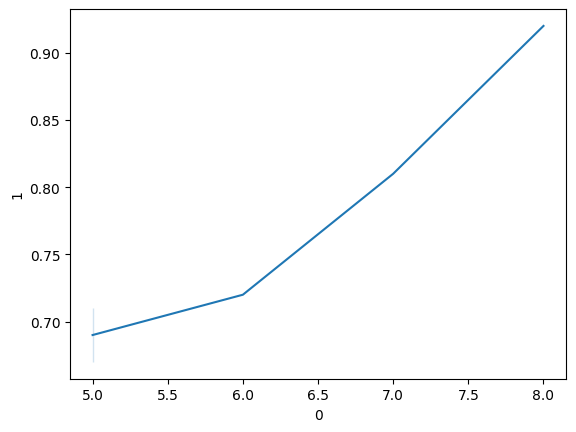

In [79]:
sns.lineplot(df, x=0, y=1)

In [113]:
new_data = []
for value in transformed_:
    new_data.append(value * max_eig_cov_vector)

new_data = np.array(new_data)
new_data

array([[ 7.8884147 , -0.58490724],
       [ 6.90199415, -0.5117665 ],
       [ 5.91409876, -0.4385164 ],
       [ 4.92030399, -0.36482887],
       [ 4.92325368, -0.36504759]])

In [114]:
data

array([[8.  , 0.92],
       [7.  , 0.81],
       [6.  , 0.72],
       [5.  , 0.71],
       [5.  , 0.67]])

<Axes: xlabel='0', ylabel='1'>

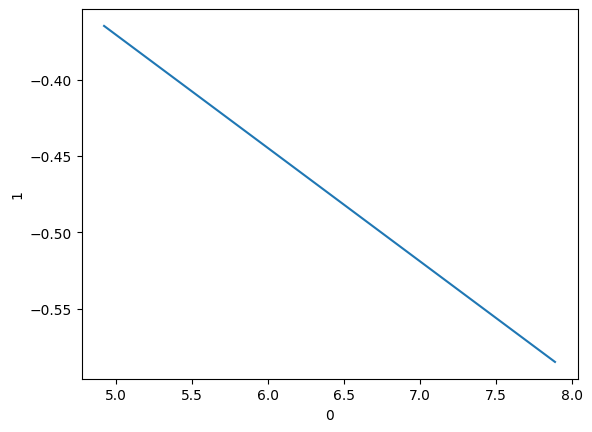

In [110]:
sns.lineplot(pd.DataFrame(new_data), x=0, y=1)

На сликата е даден граф на пријателство. Помеѓу два индивидуи (претставени со темиња) постои ребро ако и само ако тие се пријатели. Пријателството е обострано.

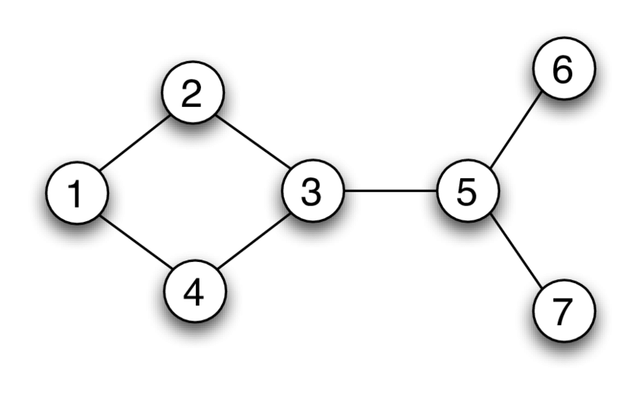

а) Да се дефинира матрицата на соседство $A$.

б) Да се пресметаат сопствените вредности и сопствените вектори на матрицата $A$.

в) Да се извлечат координатите на сопствениот вектор кој одговара на најголемата сопствена вредност. Векторот да се нормализира (`v / sum(v)`). Секоја поединечна координата ќе ја интерпретираме како мерка за вздруженост на индивидуата со неговите пријатели. Која индивидуа има најголема мерка на вздруженост? Дали векторот од мерките на вздруженост се лесно интерпретабилни согледувајќи го графикот на сликата?



In [95]:
adj_matrix_A = np.array([[0,1,0,1,0,0,0],
                        [1,0,1,0,0,0,0],
                        [0,1,0,1,1,0,0],
                         [1,0,1,0,0,0,0],
                         [0,0,1,0,0,1,1],
                         [0,0,0,0,1,0,0],
                         [0,0,0,0,1,0,0]
                         ])

In [96]:
adj_eig_values, adj_eig_vectors = np.linalg.eig(adj_matrix_A)
print(adj_eig_values)
print(adj_eig_vectors)

[-2.23606798e+00 -1.41421356e+00  2.58294518e-16  2.23606798e+00
  1.41421356e+00  0.00000000e+00  0.00000000e+00]
[[-3.65148372e-01  4.08248290e-01  6.32455532e-01 -3.65148372e-01
  -4.08248290e-01  3.71704393e-17  3.71704393e-17]
 [ 4.08248290e-01 -2.88675135e-01  4.34048725e-18 -4.08248290e-01
  -2.88675135e-01  5.00000000e-01  5.00000000e-01]
 [-5.47722558e-01 -4.62223103e-16 -6.32455532e-01 -5.47722558e-01
   1.77811526e-16 -3.71704393e-17 -3.71704393e-17]
 [ 4.08248290e-01 -2.88675135e-01  5.98516385e-17 -4.08248290e-01
  -2.88675135e-01 -5.00000000e-01 -5.00000000e-01]
 [ 4.08248290e-01  5.77350269e-01  1.76287094e-16 -4.08248290e-01
   5.77350269e-01  3.41587667e-32  3.41587667e-32]
 [-1.82574186e-01 -4.08248290e-01  3.16227766e-01 -1.82574186e-01
   4.08248290e-01  5.00000000e-01 -5.00000000e-01]
 [-1.82574186e-01 -4.08248290e-01  3.16227766e-01 -1.82574186e-01
   4.08248290e-01 -5.00000000e-01  5.00000000e-01]]


In [97]:
def get_max_eig_vector(eig_values, eig_vectors):
    max_value = max(eig_values)
    index = 0
    for i, value in enumerate(eig_values):
        if value == max_value:
            index = i
    max_eig_vector = eig_vectors[index]
    return max_eig_vector, max_value

In [98]:
max_adj_vector, max_adj_value = get_max_eig_vector(adj_eig_values, adj_eig_vectors)
print(max_adj_vector)
print(max_adj_value)

[ 4.08248290e-01 -2.88675135e-01  5.98516385e-17 -4.08248290e-01
 -2.88675135e-01 -5.00000000e-01 -5.00000000e-01]
2.23606797749979


In [99]:
normalized = max_adj_vector / np.sum(max_adj_vector)
print(normalized)

[-2.58819045e-01  1.83012702e-01 -3.79444183e-17  2.58819045e-01
  1.83012702e-01  3.16987298e-01  3.16987298e-01]


In [100]:
def get_highest_vzdruzhenost(vector):
    max_value = max(vector)
    index = 0
    for i, value in enumerate(vector):
        if value == max_value:
            return i + 1

In [101]:
print(max(normalized))

0.3169872981077807


In [102]:
print("Friend with highest vzdruzhenost is ", get_highest_vzdruzhenost(normalized))

Friend with highest vzdruzhenost is  6


Следниот тип на анализа се применува за проучување на популацијата на стадо бизони. Популацијата на бизони ќе ја поделиме во три групи: малолетници кои имаат помалку од една година; годишници од една до две години; и возрасни кои се постари од две години.

Секоја година  
- 80% од малолетниците преживуваат и стануваат годишници;  
- 90% до годишниците преживуваат и стануваат возрасни;  
- 80% од возрасните преживуваат;
- 40% од возрасните раѓаат малолетник.

Дефинирај ја матрицата $A$ од веројатности бизон од еден тип да премине во друг тип.

а) Нека $x$ е вектор од некоја почетна популација што ќе ја дефинирате вие. Што се случува со популацијата по неколку години?

б) Промени ја веројатноста за возрасните да раѓаат малолетници на 30% и 20%. Како се однесуваат овие промени врз развојот на стадото низ времето?